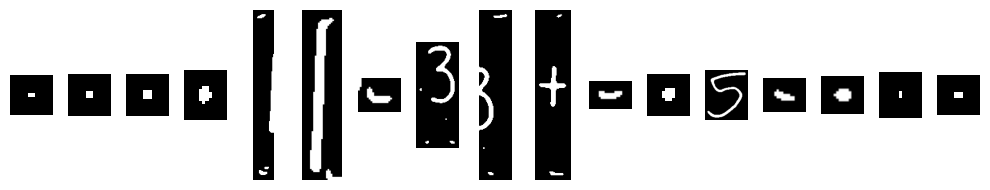

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



image_path = './Eq-processed.png'
image = cv2.imread(image_path, 0)
image = cv2.GaussianBlur(image, (5, 5), 0)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

def contours_are_close(c1, c2):
    x1, _, w1, _ = cv2.boundingRect(c1)
    x2, _, _, _ = cv2.boundingRect(c2)
    return x2 - (x1 + w1) < 10  

def process_contours(binary_image):
    contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    merged_contours = [contour for i, contour in enumerate(contours) if hierarchy[0][i][3] == -1]
    sorted_contours = sorted(merged_contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    
    processed_contours = []
    i = 0
    while i < len(sorted_contours):
        c1 = sorted_contours[i]
        if i + 2 < len(sorted_contours):
            c2 = sorted_contours[i + 1]
            c3 = sorted_contours[i + 2]
            if contours_are_close(c1, c2) and contours_are_close(c2, c3):
                
                x, y, w, h = cv2.boundingRect(np.vstack([c1, c2, c3]))
                processed_contours.append(np.array([[[x, y]], [[x + w, y]], [[x + w, y + h]], [[x, y + h]]]))
                i += 3
                continue

        processed_contours.append(c1)
        i += 1

    return processed_contours

def extract_symbols(binary_image, contours):
    symbols = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        margin = 5
        symbol = binary_image[y-margin:y+h+margin, x-margin:x+w+margin]
        symbols.append(symbol)
    return symbols

def show_symbols(symbols):
    plt.figure(figsize=(10, 2))
    for i, symbol in enumerate(symbols):
        plt.subplot(1, len(symbols), i+1)
        plt.imshow(symbol, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


processed_contours = process_contours(binary_image)
symbols = extract_symbols(binary_image, processed_contours)

show_symbols(symbols)